In [ ]:
#Importando as bibliotecas que serão utilizadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
#Lendo um arquivo binário, após ser realizado a leitura do arquivo .pcm é utilizado o np.frombuffer para estar transformando o arquivo em um array de uma direção apenas.

In [3]:
with open ("DTMF.pcm", "rb") as f:
        fid = f.read()
        f.close()
s = np.frombuffer(fid, dtype = "int16") #transforma um buffer em um array de uma dimensão

In [ ]:
#Variaveis que serão utilizadas no calculo
#ganho: o valor do ganho que será utilizado nos calculos
#tamanho: recebe o tamanho do arquivo
#tempo: recebe valor gerados iniciando do 0, até o valor máximo que seria o tamanho/8000

In [4]:
ganho = 0.5

#tamanho do arquivo
tamanho = len(s)

#tempo do audio
tempo = np.arange(0, tamanho/8000, 1/8000)

In [ ]:
#Calculando o ganho
#Um laço de repetição que possui o tamanho do vetor
#Passa por todos os valores do vetor s e multiplica eles pelo valor do ganho

In [5]:
#Calculando o ganho
sav_y = np.zeros((tamanho), dtype = "int16")
for i in range(tamanho):
    sav_y[i] = s[i] * ganho

In [ ]:
#plotando o grafico do som original

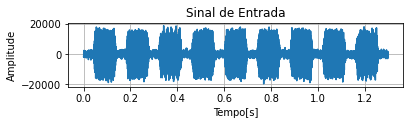

In [6]:
#Plotando o gráfico do som original
plt.subplot(3, 1, 1)
plt.title('Sinal de Entrada')
plt.xlabel("Tempo[s]")
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(tempo, s)


In [ ]:
#Plotando o gráfico apos o calculo do ganho

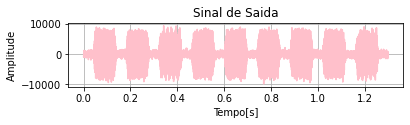

In [7]:
#Plotando a Saída
plt.subplot(3, 1, 2)
plt.title('Sinal de Saida')
plt.xlabel("Tempo[s]")
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(tempo, sav_y, color = 'pink') 

In [ ]:
#Realizando uma sobreprosição dos gráficos para facilitar a visualização dos resultados
#Cor azul = Som original
#Cor pink = Som após calculado o ganho

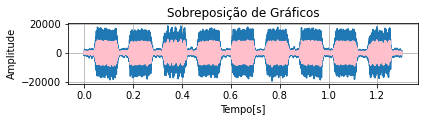

In [8]:
#Sobreposição dos gráficos
plt.subplot(3, 1, 3)
plt.title('Sobreposição de Gráficos')
plt.xlabel("Tempo[s]")
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(tempo, s)
plt.plot(tempo, sav_y, color = 'pink') 
plt.tight_layout()

In [ ]:
#Função para estar salvando o novo arquivo 

In [11]:
#Salvando o arquivo de saída
with open("DTMF-AposGanho.pcm", "wb") as novo:
    np.array(sav_y, dtype=np.int16).tofile(novo)
novo.close()